### TLDR

Founding engineer of TLDR, a startup that publishes summarized book chapters to a subscriber base. The startup core product is to provide users a daily newsletter containing a chapter summary of the user's choosen books. Write a function which takes in text and returns an executive summary.

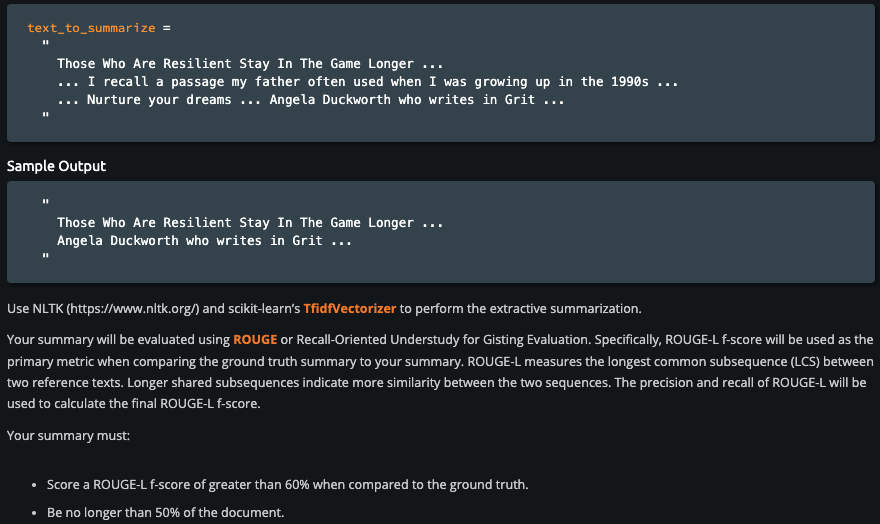

In [ ]:
"""
Pseudo Code and Comments
1. PDFs -> Font ecnoding determination -> Font normalization -> Chapter Recognition -> Text Extraction
2. Label is non existant, so we need an outcome -
    a. Top N extracted sentences which summarize the provided text
    b. Recall-Oriented understudy for gisting evaluation (ROUGE) ROUGE-L f-score
    c. So it is measuring the longest common subsequence between our two reference texts
3. Model - 
    a. NLTK - 
        1. Sentence Tokenizer :
        Objective : MLE
        Performance : (false positive + false negative) / # candidates
        
        2. Stopwords :
        Objective : MI(d, t) (Mutual Information)
        Performance : (false positive + false negative) / # candidates

    b. TFIDF Vectorizer - 
        1. Objective : tfidf(t) = tf(t, d) . idf(t)
4. Approach -
    a. Generate tf-idf for each token
    b. sum tf-idf for each sentence
    c. Apply sentence inclusion threshold

"""
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk import sent_tokenize
from nltk.corpus import stopwords

def tldr(text_to_summarize):
    # Write your code here
    sentence_tokens = np.array(sent_tokenize(text_to_summarize))

    stop_word_set = set(stopwords.words("english"))
    tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_word_set)
    # Here each row will be a sentence, each column will be a token of sentence / word and value will be tf-idf
    tf_idf = tf_idf_vectorizer.fit_transform(sentence_tokens)
    # Sum up of tf-idf, and get in array
    sentence_tf_idf_sums_matrix = tf_idf.sum(axis=1)
    sentence_tf_idf_sums_array = np.asarray(sentence_tf_idf_sums_matrix).squeeze()
    selected_sentences_indices = np.where(sentence_tf_idf_sums_array > 3)
    summary_sentences = sentence_tokens[selected_sentences_indices]
    summary = ''.join(summary_sentences)
    return summary